In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
data= pd.read_csv('../input/fer2013/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [2]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [3]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [4]:
from PIL import Image
depth = 1
height = int(sqrt(len(data.pixels[0].split()))) 
width = int(height)

In [5]:
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)


In [6]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

In [7]:
y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes) 

In [8]:
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64

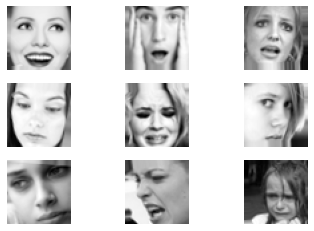

In [9]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break 

In [10]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size) 

In [11]:
model=Sequential()    
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same',input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.3)

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
          
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
          
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
          
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
          
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

    # create model 

    # summary layers
print(model.summary())




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       5

In [12]:

opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [13]:
from keras.callbacks import ModelCheckpoint
filepath="weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [15]:
num_epochs = 200 # we iterate 200 times over the entire training set 
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=2,  
                    callbacks=callbacks_list,
                    validation_data=val_flow,  
                    validation_steps=len(X_val) / batch_size) 

Epoch 1/200

Epoch 00001: val_loss did not improve from 1.88311
449/448 - 19s - loss: 1.7575 - accuracy: 0.2929 - val_loss: 1.8913 - val_accuracy: 0.2976
Epoch 2/200

Epoch 00002: val_loss improved from 1.88311 to 1.84731, saving model to weights_min_loss.hdf5
449/448 - 19s - loss: 1.6699 - accuracy: 0.3374 - val_loss: 1.8473 - val_accuracy: 0.3268
Epoch 3/200

Epoch 00003: val_loss improved from 1.84731 to 1.62078, saving model to weights_min_loss.hdf5
449/448 - 20s - loss: 1.5977 - accuracy: 0.3681 - val_loss: 1.6208 - val_accuracy: 0.3954
Epoch 4/200

Epoch 00004: val_loss improved from 1.62078 to 1.56320, saving model to weights_min_loss.hdf5
449/448 - 19s - loss: 1.5319 - accuracy: 0.4008 - val_loss: 1.5632 - val_accuracy: 0.4199
Epoch 5/200

Epoch 00005: val_loss improved from 1.56320 to 1.39971, saving model to weights_min_loss.hdf5
449/448 - 19s - loss: 1.4750 - accuracy: 0.4255 - val_loss: 1.3997 - val_accuracy: 0.4650
Epoch 6/200

Epoch 00006: val_loss improved from 1.39971 t

Epoch 49/200

Epoch 00049: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.5926 - accuracy: 0.7814 - val_loss: 1.0554 - val_accuracy: 0.6615
Epoch 50/200

Epoch 00050: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.5779 - accuracy: 0.7841 - val_loss: 1.0656 - val_accuracy: 0.6684
Epoch 51/200

Epoch 00051: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.5599 - accuracy: 0.7952 - val_loss: 1.0363 - val_accuracy: 0.6673
Epoch 52/200

Epoch 00052: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.5543 - accuracy: 0.7937 - val_loss: 1.0354 - val_accuracy: 0.6682
Epoch 53/200

Epoch 00053: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.5487 - accuracy: 0.7952 - val_loss: 1.0670 - val_accuracy: 0.6617
Epoch 54/200

Epoch 00054: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.5350 - accuracy: 0.8027 - val_loss: 1.0578 - val_accuracy: 0.6721
Epoch 55/200

Epoch 00055: val_loss did not improve from 0.96655
449/4

Epoch 102/200

Epoch 00102: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.2245 - accuracy: 0.9172 - val_loss: 1.4943 - val_accuracy: 0.6757
Epoch 103/200

Epoch 00103: val_loss did not improve from 0.96655
449/448 - 18s - loss: 0.2158 - accuracy: 0.9212 - val_loss: 1.5042 - val_accuracy: 0.6762
Epoch 104/200

Epoch 00104: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.2183 - accuracy: 0.9188 - val_loss: 1.5248 - val_accuracy: 0.6762
Epoch 105/200

Epoch 00105: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.2172 - accuracy: 0.9202 - val_loss: 1.4915 - val_accuracy: 0.6779
Epoch 106/200

Epoch 00106: val_loss did not improve from 0.96655
449/448 - 18s - loss: 0.2074 - accuracy: 0.9229 - val_loss: 1.4914 - val_accuracy: 0.6670
Epoch 107/200

Epoch 00107: val_loss did not improve from 0.96655
449/448 - 18s - loss: 0.2041 - accuracy: 0.9258 - val_loss: 1.5197 - val_accuracy: 0.6785
Epoch 108/200

Epoch 00108: val_loss did not improve from 0.9665

Epoch 155/200

Epoch 00155: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.1215 - accuracy: 0.9557 - val_loss: 1.7657 - val_accuracy: 0.6832
Epoch 156/200

Epoch 00156: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.1239 - accuracy: 0.9544 - val_loss: 1.7684 - val_accuracy: 0.6865
Epoch 157/200

Epoch 00157: val_loss did not improve from 0.96655
449/448 - 18s - loss: 0.1265 - accuracy: 0.9540 - val_loss: 1.7111 - val_accuracy: 0.6807
Epoch 158/200

Epoch 00158: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.1251 - accuracy: 0.9533 - val_loss: 1.7085 - val_accuracy: 0.6810
Epoch 159/200

Epoch 00159: val_loss did not improve from 0.96655
449/448 - 19s - loss: 0.1179 - accuracy: 0.9575 - val_loss: 1.7759 - val_accuracy: 0.6729
Epoch 160/200

Epoch 00160: val_loss did not improve from 0.96655
449/448 - 18s - loss: 0.1183 - accuracy: 0.9555 - val_loss: 1.7837 - val_accuracy: 0.6790
Epoch 161/200

Epoch 00161: val_loss did not improve from 0.9665

In [17]:
print(1)

1


In [19]:
loss = model.evaluate(X_val/255., y_val) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 10ms/step - loss: 1.8638 - accuracy: 0.6796
Test Loss 1.863843321800232
Test Acc: 0.6795764565467834


In [20]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [21]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 1s 8ms/step


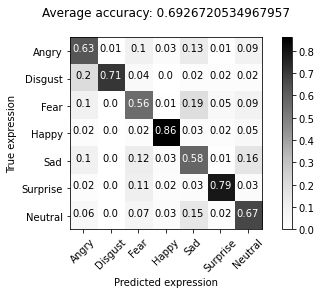

In [22]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [23]:
model.save("best.hdf5")

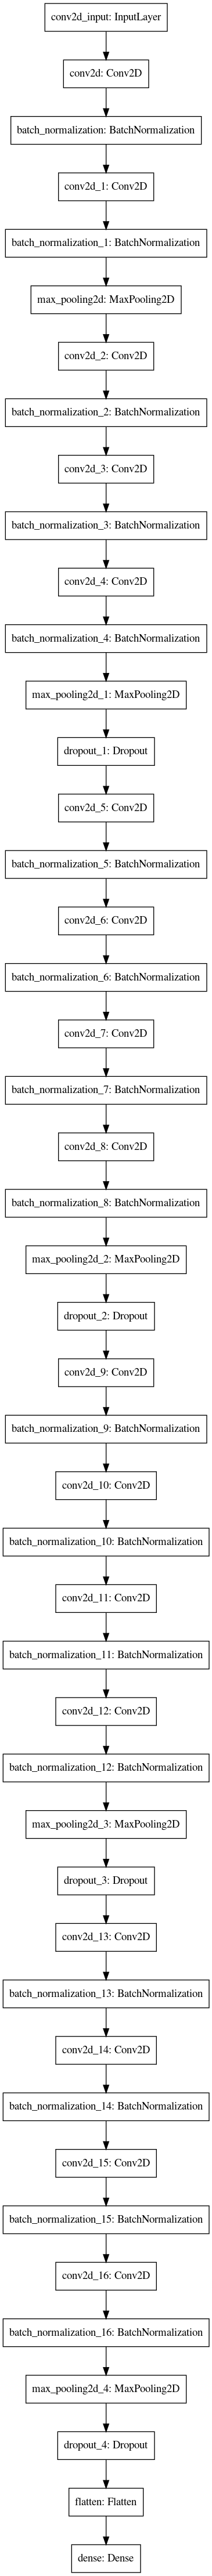

In [27]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)